In [57]:
import tweepy
import json

In [58]:
json_file = open("twitter_credential.json",)
credential = json.load(json_file)

In [59]:
consumer_key = credential["consumer_key"]
consumer_secret = credential["consumer_secret"]
access_token = credential["access_token"]
access_token_secret = credential["access_token_secret"]

In [60]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

public_tweets = api.home_timeline()
for tweet in public_tweets:
    print(tweet.text)

Voces me comovem. Muito obrigado por existirem!
Feliz Aniversário, tio Paulo Coelho! https://t.co/yAegPWkv45 via @YouTube
RT @NASAJPL: Brazilian partnership will begin producing our #COVID19 ventilator, VITAL, now that it has been approved for commercial manufa…
🌀 Cameras outside the @Space_Station captured views of Tropical Storm Laura from 250 miles above, just prior to the… https://t.co/FFzLLCOnvH
I can definitely see the resemblance 😉👊🏾
Im proud to see that you’re majoring in aerospace engineering 👏🏾👏🏾 when as… https://t.co/v2fjBtIDG9
Ready to launch on a learning adventure this Fall? 

@NASASTEM is here to help kick-start your journey with lesson… https://t.co/clwCm9tRXD
A morning without The Divine is like a mind with no thoughts, EMPTY. Thank you Divine Energy for this blessing we c… https://t.co/n7KUiYHxL2
FACT: There is no threat from the tiny asteroid that will zoom past Earth on Nov. 2.

Our Planetary Defense Coordin… https://t.co/75deuKREok
RT @AlexisCrystal3: Best workout 

In [61]:
import pandas as pd
from textblob import TextBlob
from wordcloud import WordCloud
import re
import matplotlib.pyplot as plt

In [62]:
#extract tweets 
tweets = api.user_timeline(screen_name="BillGates",count=100,lang = "en", tweet_mode="extended")

In [63]:
i = 1
for tweet in tweets[0:5]:
    print(str(i)+") "+tweet.full_text)
    i+=1

1) Mosquito City is home to the world’s largest captive colony of mosquitoes. @IfakaraHealth Institute is doing fascinating research there about mosquito behaviors and finding ways to outsmart them. https://t.co/p3r11gMqdn
2) Deaths from malaria have been cut by more than half since the year 2000. Increased bed net use is one of the main reasons why https://t.co/qxMqqCUs11 #WorldMosquitoDay
3) RT @gavi: Vaccines prevent millions of deaths every year by harnessing the body’s immune system to create defences against future infection…
4) Ridding the world of preventable, treatable diseases like malaria will save millions of lives and lead to healthier, more prosperous communities. And that will make them better prepared to confront any new health challenges like COVID-19 in the future. https://t.co/6AbgoLSVai https://t.co/D6xm7XeuBH
5) RT @GlobalFund: As a community health worker in Kenya’s Homa Bay County, Evaline has helped her community dramatically reduce the number of…


In [64]:
#create dataFrame
dataset = pd.DataFrame([tweet.full_text for tweet in tweets],columns=['Tweets'])

In [65]:
dataset

,Tweets
0,Mosquito City is home to the world’s largest c...
1,Deaths from malaria have been cut by more than...
2,RT @gavi: Vaccines prevent millions of deaths ...
3,"Ridding the world of preventable, treatable di..."
4,RT @GlobalFund: As a community health worker i...
...,...
95,I’m connecting live with @TEDchris and @WhitPe...
96,Thanks @reddit for joining me yesterday to dis...
97,I’m answering your questions about the #COVID1...
98,I know many parents are looking for resources ...


In [68]:
#clean the text
#create a function to clean tweets
def cleanText(text):
    text = re.sub(r'@[A-Za-z]+','',text) #removed @mentions
    text = re.sub(r'#','',text) #Removing the # the hyper string symbol
    text = re.sub(r'RT[\s]','',text) #Removing RT
    text = re.sub(r'http?:\/\/S+','',text) # remove 
    text = re.sub(r'https:+','',text) # remove 

    return text

In [69]:
dataset['Tweets'] = dataset['Tweets'].apply(cleanText)

In [70]:
dataset.iloc[4]

Tweets    : As a community health worker in Kenya’s Homa...
Name: 4, dtype: object

In [71]:
#create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#create a function to gettge polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity
    


In [72]:
#create two new columns
dataset['Subjectivity'] = dataset['Tweets'].apply(getSubjectivity)
dataset['Polarity'] = dataset['Tweets'].apply(getPolarity)

In [73]:
dataset

,Tweets,Subjectivity,Polarity
0,Mosquito City is home to the world’s largest c...,0.725000,0.450000
1,Deaths from malaria have been cut by more than...,0.250000,0.125000
2,: Vaccines prevent millions of deaths every ye...,0.125000,0.000000
3,"Ridding the world of preventable, treatable di...",0.394886,0.284091
4,: As a community health worker in Kenya’s Homa...,0.000000,0.000000
...,...,...,...
95,I’m connecting live with and to talk about w...,0.312500,0.068182
96,Thanks for joining me yesterday to discuss th...,0.100000,0.100000
97,I’m answering your questions about the COVID19...,0.000000,0.000000
98,I know many parents are looking for resources ...,0.250000,0.250000


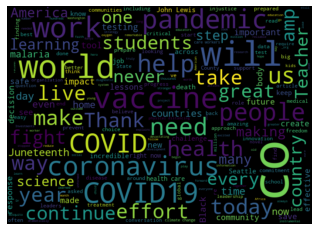

In [74]:
allwords = ' '.join([twt for twt in dataset['Tweets']])
wordCloud = WordCloud(width=700,height=500,random_state=20,max_font_size=119).generate(allwords)

plt.imshow(wordCloud,interpolation="bilinear")
plt.axis("off")
plt.show()

In [75]:
#create a function to compute negative, neutral and positive analysiss

def getAnalysis(score):
    if score <0:
        return 'Negative'
    elif score==0:
        return 'Neutral'
    else:
        return 'Positive'

dataset['Analysis'] = dataset['Polarity'].apply(getAnalysis)

In [76]:
dataset

,Tweets,Subjectivity,Polarity,Analysis
0,Mosquito City is home to the world’s largest c...,0.725000,0.450000,Positive
1,Deaths from malaria have been cut by more than...,0.250000,0.125000,Positive
2,: Vaccines prevent millions of deaths every ye...,0.125000,0.000000,Neutral
3,"Ridding the world of preventable, treatable di...",0.394886,0.284091,Positive
4,: As a community health worker in Kenya’s Homa...,0.000000,0.000000,Neutral
...,...,...,...,...
95,I’m connecting live with and to talk about w...,0.312500,0.068182,Positive
96,Thanks for joining me yesterday to discuss th...,0.100000,0.100000,Positive
97,I’m answering your questions about the COVID19...,0.000000,0.000000,Neutral
98,I know many parents are looking for resources ...,0.250000,0.250000,Positive


In [77]:
# Print all of the positive tweets
j=1
sortDF = dataset.sort_values(by=['Polarity'])
for i in range(0,sortDF.shape[0]):
    if(sortDF['Analysis'][i] == 'Positive'):
        print(str(j)+ ') '+sortDF['Tweets'][i])
        j+=1
        print()


1) Mosquito City is home to the world’s largest captive colony of mosquitoes.  Institute is doing fascinating research there about mosquito behaviors and finding ways to outsmart them. //t.co/p3r11gMqdn

2) Deaths from malaria have been cut by more than half since the year 2000. Increased bed net use is one of the main reasons why //t.co/qxMqqCUs11 WorldMosquitoDay

3) Ridding the world of preventable, treatable diseases like malaria will save millions of lives and lead to healthier, more prosperous communities. And that will make them better prepared to confront any new health challenges like COVID-19 in the future. //t.co/6AbgoLSVai //t.co/D6xm7XeuBH

4) The progress the world has made against malaria is one of the greatest success stories ever. The COVID-19 pandemic only reinforces why eradicating malaria is so essential. //t.co/aEtxSWNegs

5) : A safe and effective COVID19 vaccine is the way out of this devastating pandemic🌍

Our Director of Vaccine R&amp;D, Melanie…

6) Teaching s

In [78]:
j = 1
soretd_df = dataset.sort_values(by=['Polarity'],ascending='False')
for i in range(0,soretd_df.shape[0]):
    if(soretd_df['Analysis'][i] == 'Negative'):
        print(str(j)+ ') '+sortDF['Tweets'][i])
        j+=1
        print()


1) Because of long-standing barriers that are made worse by COVID-19, hundreds of thousands of students with promise may never start college. This would be disastrous for these young people and for the country. Here’s what we’re doing to help: //t.co/2NqFWLr30o

2) : Three lessons that have been central to the COVID19 response in South Africa, Liberia, &amp; other countries:
🔸 Screening…

3) Globally, a lack of medical oxygen–needed to treat pneumonia, malaria, and other diseases–leads to hundreds of thousands of deaths each year.  founded _Tele to address this often-overlooked challenge. //t.co/TSea0oyDjP

4) : “It’s that clarity of language about the VALUE of black life in America that distinguishes Juneteenth as emancipation…

5) : “Only those feigning blindness fail to see the body of work we are, and the work of body we have done. 

Everything is what it is…

6) : Juneteenth recognizes &amp; celebrates Black people’s freedom and the end of slavery in the US!  19 Jun 1865 Union Arm

In [80]:
plt.style.use('fivethirtyeight')

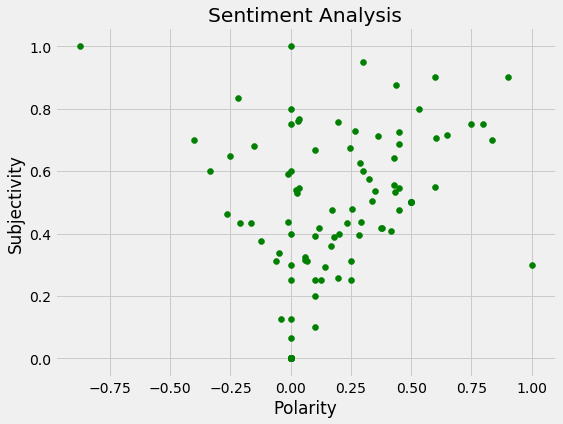

In [81]:
#plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0,dataset.shape[0]):
    plt.scatter(dataset['Polarity'][i],dataset['Subjectivity'][i],color="green")
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()